### wiki에 나오는 Normal distribution(or Gaussian distribution) 그래프를 그려보자
https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C%EB%B6%84%ED%8F%AC

그래프 code는 다음 블로그 code(아주 간단한 GAN 구현하기)를 참고 - http://blog.naver.com/atelierjpro/220984758512

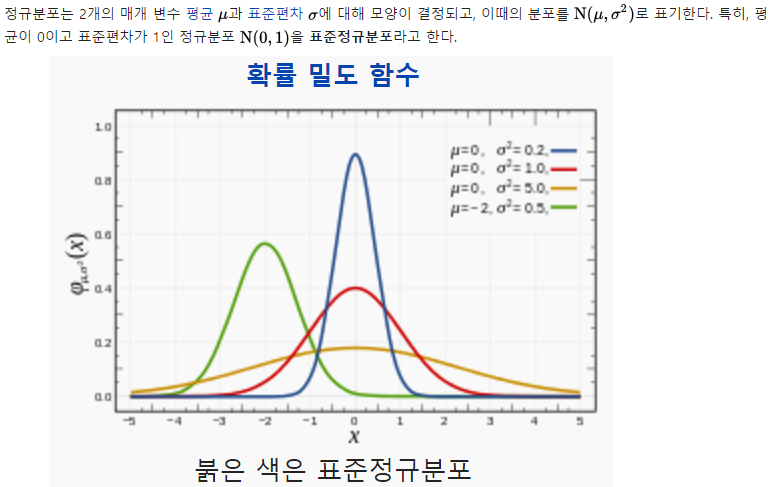

In [1]:
from IPython.display import Image
Image('image/normal_distribution.png')

#### 정규분포에서 나오는 표기법을 위해 변수로 사용하는 그리스 문자를 한번 더 보고 가자.
평균 - mu : 뮤

표준편차 - sigma : 시그마 

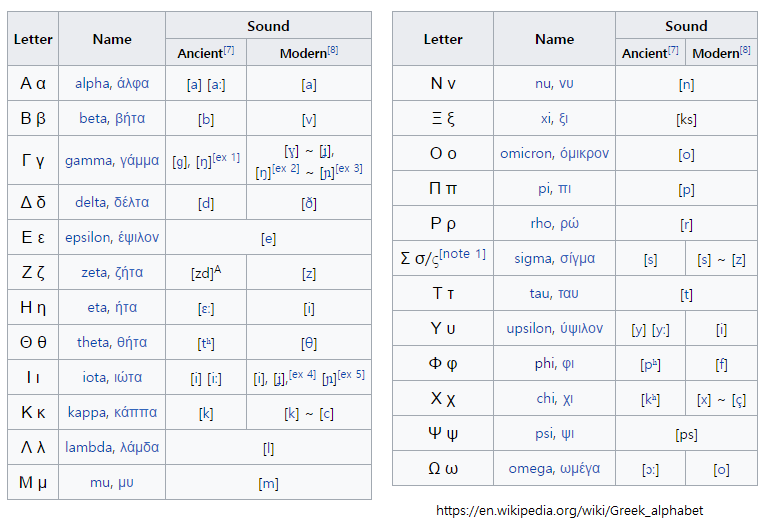

In [2]:
from IPython.display import Image
Image('image/greek_alphabet.png')

#### 정규분포의 특징을 나타내는 규칙이 있으니 알아두자. 새로운 모델 등에서 이런 걸 꼭 사용하더라. 그리고 설명은 특별히 안하는 것을 초짜들은 꼭 유념하자. ^^
통계학에서 68-95-99.7 규칙(영어: 68-95-99.7 rule)은 정규 분포를 나타내는 규칙으로, 경험적인 규칙(empirical rule)이라고도 한다. 3시그마 규칙(three-sigma rule)이라고도 하는데 이 때는 평균에서 양쪽으로 3표준편차의 범위에 거의 모든 값들(99.7%)이 들어간다는 것을 나타낸다.

https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99

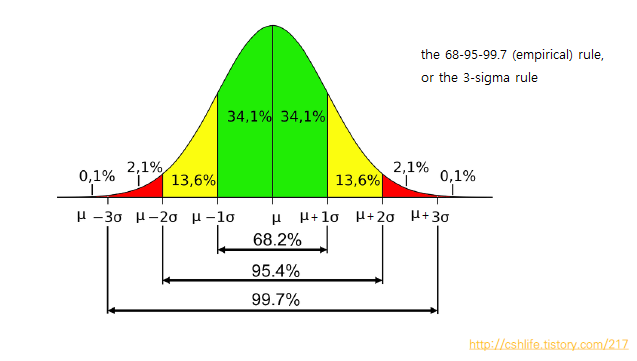

In [3]:
from IPython.display import Image
Image('image/normal_distribution_3sigma_rule.png')

평균 : 0.0, 표준편차(분산 : 0.2) : 0.4472135954999579
평균 : 0.0, 표준편차(분산 : 1.0) : 1.0
	평균이 0이고 표준편차가 1인 정규분포 N(0,1)을 표준정규분포라 한다.
평균 : 0.0, 표준편차(분산 : 5.0) : 2.23606797749979
평균 : -2.0, 표준편차(분산 : 0.5) : 0.7071067811865476


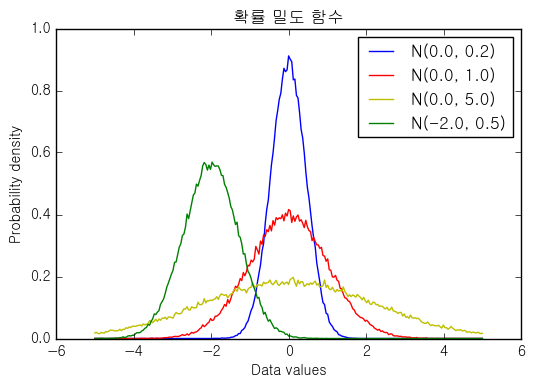

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정 : windows 10 환경
from matplotlib.pyplot import rc
rc('font',family='New Gulim')

num_samples = 100000    # 샘플링할 정규분포값의 갯수 (test : 100, 1000, 10000, ....)

# wiki 그래프에 나온 4가지 경우를 설정
mu = [0., 0., 0., -2.]    # 평균 - mu is mean or expectation of the distribution (and also its median and mode).
sigma_square = [0.2, 1.0, 5.0, 0.5]    # 분산 - sigma**2 is variance

# plot parametes
x_from = -5
x_to = 5
num_bins = 250
plot_color = ['b-', 'r-', 'y-', 'g-']
description_legend = None

bins = np.linspace(x_from, x_to, num_bins)    # 구간을 나누는 단위 : 큰 값을 사용하면 graph가 세밀해진다. (test : 50, 100, 250, 500, ....)

# draw normal distribution
for i in range(len(mu)):
    sigma = sigma_square[i] ** 0.5    # 표준편차 - sigma is standard deviation
    description = "평균 : " + str(mu[i]) + ", 표준편차(분산 : " + str(sigma_square[i]) + ") : " + str(sigma)
    description_label = "N(" + str(mu[i]) + ", " + str(sigma_square[i]) + ")"
    print(description)
    if mu[i] == 0 and sigma == 1.0:
        print("\t평균이 0이고 표준편차가 1인 정규분포 N(0,1)을 표준정규분포라 한다.")
    x = np.random.normal(mu[i], sigma, num_samples)
    px, _ = np.histogram(x, bins = bins, density = True)
    v = np.linspace(x_from, x_to, num=len(px))
    l = plt.plot(v, px, plot_color[i], linewidth=1, label = description_label)

plt.legend()
plt.title('확률 밀도 함수')
plt.xlabel('Data values')
plt.ylabel('Probability density')
plt.show()
plt.close()